# Data Pre-processing Tutorial
## Introduction
This tutorial aims to teach some common data pre-processing techniques with the help of sklearn's powerful and easy-to-use libraries like sklearn.preprocessing. 

Data preprocessing is a data mining technique which transforms raw data into a more usable and standard format. Data collected by scientists or other sources is often inconsistent, noisy or even sometimes redundant, and is likely to contain many errors. Data preprocessing is a effective method to address these problems. After pre-processing, the data set becomes more representative of the real world scenario and more powerful in making predictions.

There are many more options for pre-processing which we’ll explore which include data normalization, standardization, label encoding, one-hot encoding, PCA and ZCA whitening.

Upon finishing this tutorial, you will be exposed to many different data preprocessing 

## Table of Content

### 1. Using raw data
### 2. Data normalization
### 3. Data standardization
### 4. Principal component analysis
### 5. Other techniques and cautions!
### 6. Further resources


### 1. Using Raw Data
But first of all, we have to address the question of why do we need to do data pre-processing? Why can't we just feed whatever data we have in hand to some models directly? The short answer is you can, but the result might not be as satisfactory as you would expect it to be.

Below we illustrate the performance of K-nearest-neighbor algorithm without any data pre-processing on the Wine quality data set from: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [46]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

This wine dataset contains the following information according to http://archive.ics.uci.edu/ml/datasets/Wine+Quality

Attribute Information:

Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 

Output variable (based on sensory data): 
12 - quality (score between 0 and 10) But for simplification, we'll change our label to binary to indicate whether the score is >= 5 or < 5

Below we show the first 5 instances in the dataset to get a sense of what it looks like.

In [2]:
# loading csv file to pandas dataframe
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' , sep = ';')
# get attributes
X = df.drop('quality' , 1).values
# get the labels
y = df['quality'].values
# making the labels into binary values
y = y <= 5
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Below we show a histogram of each attribute and output quality

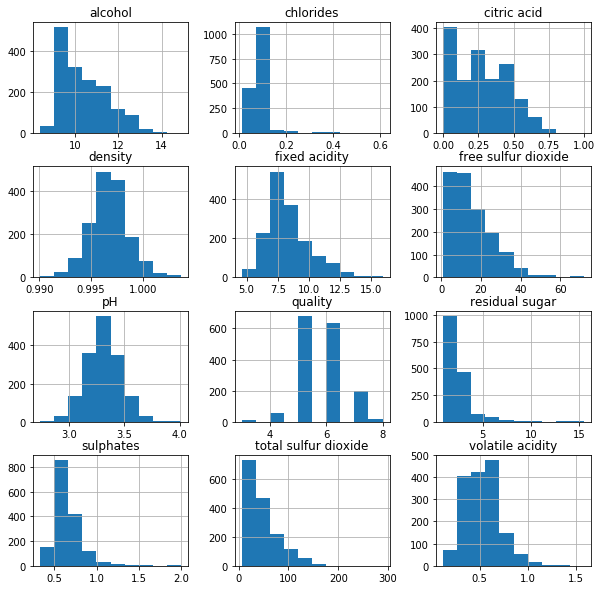

In [3]:
pd.DataFrame.hist(df, figsize = [10,10]);

It's pretty obvious that these attributes have different ranges in their values. For example, sulphates range from 0.2 to 1 but total sulfur dioxide ranges from 0 to 300+. Out intuition tells us that algorithms like KNN which uses distances between data points will focus on those attributes with larger values and hence unfairly give these attributes more "importance" in predicting the final result. 

However, for the purpose of illustration we will just input this raw data into a KNN model.

(Extra resources: if you are interested in the details of KNN you can check out https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)

In [4]:
# We first split out data into training (80%) and testing (20%)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Using KNN module from sklearn
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn.predict(X_test))

0.64375000000000004

### 2. Data Normalization
An accuracy of 0.64375000000000004 is just a little better than pure guessing. It seems that our intuition was correct: in order to better suit the characteristics of KNN algorithm, it is sensible for us to make all attributes change into the same range of values so that no attribute is "favored" in any way.

A powerful tool in sklearn allows us to convert each attribute to the same scale of 0 to 1. This is commonly known as normalization. Mathematically speaking for each attribute Xi, Xi(normalized) = (Xi - Xmin) / (Xmax - Xmin).

Below we show the histogram of our normalized data.

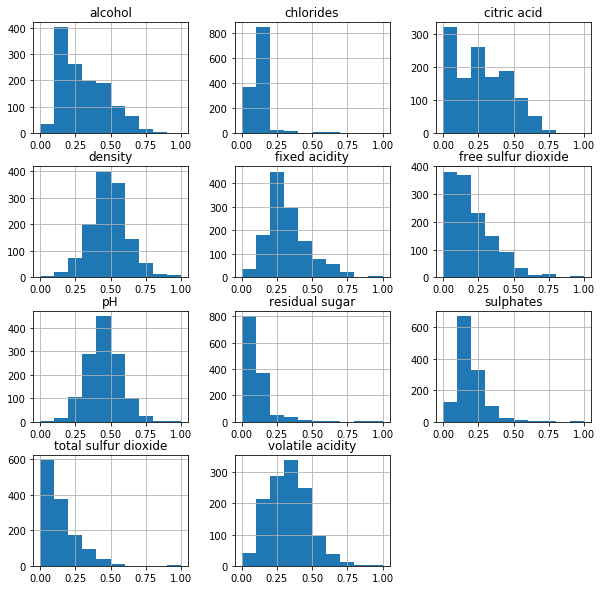

In [6]:
# Using MinMaxScaler module 
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
normalizer=MinMaxScaler()
# Scaling down both train and test data set
X_train_norm=normalizer.fit_transform(X_train)
X_test_norm=normalizer.fit_transform(X_test)

# creating a temporary dataframe to store normalized version of attributes
temp = pd.DataFrame(columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
temp['fixed acidity'] = X_train_norm[:,0]
temp['volatile acidity'] = X_train_norm[:,1]
temp['citric acid'] = X_train_norm[:,2]
temp['residual sugar'] = X_train_norm[:,3]
temp['chlorides'] = X_train_norm[:,4]
temp['free sulfur dioxide'] = X_train_norm[:,5]
temp['total sulfur dioxide'] = X_train_norm[:,6]
temp['density'] = X_train_norm[:,7]
temp['pH'] = X_train_norm[:,8]
temp['sulphates'] = X_train_norm[:,9]
temp['alcohol'] = X_train_norm[:,10]

pd.DataFrame.hist(temp, figsize = [10,10]);

All attributes fall in the same range of 0 to 1 now.
We now feed this normalized data set into our KNN model and observe a higher accuracy compared to before.

In [7]:
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_norm,y_train)

accuracy_score(y_test,knn.predict(X_test_norm))

0.72499999999999998

With normalizing the data to the same range, we achieved a 12.6% increase in accuracy.

### 3. Data Standardization
Another useful technique is to standardize the data. Mathematically speaking, standardizing means for each attribute of a data point, we first subtract the mean of that attribute across all datapoints from it and then divide by the standard deviation of that attribute. Xi = (Xi - u) / sigma where u is the mean and sigma is standard deviation.

We first take a look at the histogram of the standardized data

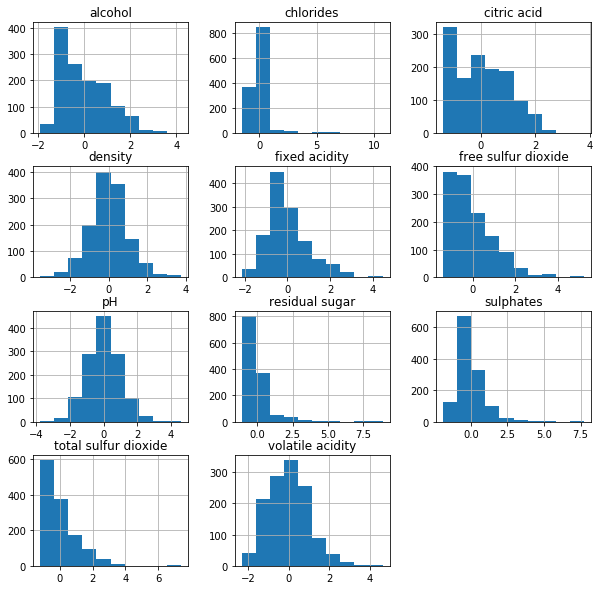

In [8]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
from sklearn.preprocessing import scale
# standardizing train and test attributes
X_train_std=scale(X_train)
X_test_std=scale(X_test)

# creating a temporary dataframe to store normalized version of attributes
temp1 = df = pd.DataFrame(columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
temp1['fixed acidity'] = X_train_std[:,0]
temp1['volatile acidity'] = X_train_std[:,1]
temp1['citric acid'] = X_train_std[:,2]
temp1['residual sugar'] = X_train_std[:,3]
temp1['chlorides'] = X_train_std[:,4]
temp1['free sulfur dioxide'] = X_train_std[:,5]
temp1['total sulfur dioxide'] = X_train_std[:,6]
temp1['density'] = X_train_std[:,7]
temp1['pH'] = X_train_std[:,8]
temp1['sulphates'] = X_train_std[:,9]
temp1['alcohol'] = X_train_std[:,10]
# Plotting histogram
pd.DataFrame.hist(temp1, figsize = [10,10]);

Every attribute has a mean of 0 and standard deviation of 1 after we standardize the whole dataset. We then feed our standardized data into the kNN model and amazingly our accuracy increased to 0.70625

In [9]:
# Run KNN on standardized data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std,y_train)
accuracy_score(y_test,knn.predict(X_test_std))

0.70625000000000004

In summary, for normalization the motivation is that we don't want our data to be affected by different scales or unit. For example, the same data set about lengths of an object can be presented in meters for certain attributes but in centi-meters for another attribute. Algorithm relying on geometric distances like KNN will unfairly place more weight on the larger numeric values (those in centimeters) and hence the result is intuitively wrong. 

### 4. Principal Component Analysis

After doing normalization or standardization, we could potentially reduce the number of features/attributes by selecting only the most "important" ones to be fed into a model(regression, Neural Networks, etc.)
When there are many features in our data set, it might be computationally expensive to directly feed the raw data to a model. The training phase could take days or even weeks. 

To overcome this issue, we could invoke Principal Component Analysis from sklearn that could help us with diemensionality reduction.

If you want to learn more about PCA, this is a very good resource from Stanford University: http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

In the original wine dataset there are 11 features/attributes. We can use PCA to reduce the number to, for example, 3 by the following codes:

In [88]:
from sklearn.decomposition import PCA
# Get the top 3 principal components
pca = PCA(n_components=3)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)

print("original shape of wine data:   ", X_train_std.shape)
print("PCA shape:", X_train_pca.shape)

original shape of wine data:    (1279, 11)
PCA shape: (1279, 3)


Below is a comparison of what the old and new dataframe looks like after applying PCA

In [65]:
PCA_df = pd.DataFrame(data = X_train_pca, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print("original dataframe: \n")
print(df.head())

original dataframe: 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.598924         -0.200069     0.479299       -0.578456  -0.136535   
1      -0.220728         -1.985666     0.686314       -0.234582  -0.794504   
2      -0.045089          2.247928     0.013515       -0.303356   0.007395   
3       1.301482         -0.603268     2.031911        0.281229   0.583117   
4      -0.162182          0.433531    -0.245254       -0.303356  -0.157097   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.202057             -0.971491  0.171735 -0.281358   0.692456   
1             2.062523              0.643420 -0.374255  0.114379   1.558702   
2            -0.828962             -0.697261 -0.267198 -0.347315  -1.097788   
3            -0.362593             -0.514440  0.161029 -0.479227   0.519206   
4             0.849965              1.801280 -0.304668 -0.083490  -0.982288   

    alcohol  
0  0.444117  
1  0.8

In [66]:
print("PCA dataframe \n")
print(PCA_df.head())

PCA dataframe 

   principal component 1  principal component 2  principal component 3
0               0.744215              -1.691693              -0.522290
1               0.580855               0.000983               3.169771
2              -0.798018              -0.035640              -2.031388
3               2.163150              -1.466921               0.741307
4              -0.600865               1.683463               0.398444


To get a more intuitive sense of what PCA really does, I'll use a 2d example below where we have multiple 2 dimensional data points and we want to reduce the dimension to 1. There is actually a relationship between the two features (almost linearly related)

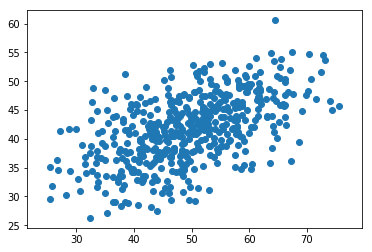

In [52]:
x = []
y = []
# genereate 500 points that has a almost linear relationship between the 2 attributes
for i in range(500):
    newVal = random.normalvariate(50,10)
    x.append(newVal)
    y.append(newVal / 3.0 + random.normalvariate(25,5))
    
plt.scatter(x, y)
plt.axis('equal');

We now try to reduce the 2 dimensional data to 1 dimension

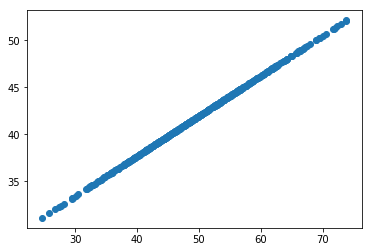

In [87]:
# Only getting the top 1 principal component
pca = PCA(n_components=1)
pca.fit(list(zip(x,y)))
x_pca = pca.transform(list(zip(x,y)))
x_new = pca.inverse_transform(x_pca)
plt.scatter(x_new[:, 0], x_new[:, 1])

We can visually see that PCA actually picks out the component with the largest variance as the first principal component. This is also the line which all data points have the least distance from. PCA helps us reduce the dimension of our data set by choosing the first k principal components which is considered to be the most representative of the data. In this way, we only throw away features that are less relevant and save computation power.

Below we try to do a regression on the original wine data with standardization already applied. And we achieve an accuracy of 0.74062499999999998

In [84]:
# Fitting logistic regression on our standardized data set
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2',C=.01)
LR.fit(X_train_std,y_train)
accuracy_score(y_test,LR.predict(X_test_std))

0.74062499999999998

Now we try to reduce the number of features we use from 11 to 9 so that computation resources can be saved a little. The fact is that the accuracy is still the same! This means that some features are not relevant or redundant in making the prediction. Usually we find that using only a subset of the whole feature space can not only improve run time but also improve accuracy.

In [85]:
pca1 = PCA(n_components=9)
pca1.fit(X_train_std)
x_train_pca = pca1.transform(X_train_std)
x_test_pca = pca1.transform(X_test_std)

LR.fit(x_train_pca,y_train)
accuracy_score(y_test,LR.predict(x_test_pca))

0.74062499999999998

### 5. Other techniques and cautions!

There are many other data pre-processing techniques and you cannot blindly choose which one to apply to your data. I'll illustrate a failed attempt of using ZCA whitening on the wine dataset we used many times above.

The code below is a zca_whitening implementation adapted from: https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python

In [92]:
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

We now apply ZCA whitening to our wine data set and run regression again to check performance

In [93]:
train_ZCAMatrix = zca_whitening_matrix(X_train) # get ZCAMatrix
train_xZCAMatrix = np.dot(train_ZCAMatrix, X_train) # project X onto the ZCAMatrix

test_ZCAMatrix = zca_whitening_matrix(X_test) # get ZCAMatrix
test_xZCAMatrix = np.dot(test_ZCAMatrix, X_test) # project X onto the ZCAMatrix

LR.fit(train_xZCAMatrix,y_train)
# Checking the model's accuracy
accuracy_score(y_test,LR.predict(test_xZCAMatrix))

0.56874999999999998

ZCA whitening reduces our accuracy to 0.56874999999999998. Clearly we should not use ZCA on our wine data set.

### 6. Further resources

There are many other helpful blogs, tutorials that discuss data pre-processing. This tutorial is by no means comprehensive.

Below are several blogs that I personally find very helpful.
1. Talks about rescale, binarize, standardization and normalization
https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/

2. A comprensive coverage on the entire topic
https://www.sciencedirect.com/science/article/pii/S0950705115004785